# Imports

In [14]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns

# Dados de Treino

In [47]:
treino = pd.read_csv('Safra_2018-2019.csv').drop(['Unnamed: 0'],axis=1)
treino.set_index('Identificador_Agricultor',inplace=True)
treino.fillna(0,inplace=True)
for col in treino.columns:
    treino[col] = treino[col].apply(lambda x: int(x))
treino

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
Identificador_Agricultor,,,,,,,,,
SCROP00001,188,1,0,1,0,0,0,1,0
SCROP00002,209,1,0,1,0,0,0,2,1
SCROP00003,257,1,0,1,0,0,0,2,1
SCROP00004,257,1,1,1,0,0,0,2,1
SCROP00005,342,1,0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...
SCROP79996,209,0,1,2,20,12,6,2,0
SCROP79997,232,0,1,2,20,12,9,1,0
SCROP79998,256,0,1,2,10,14,10,1,0


## Normalizar

In [30]:
norm = preprocessing.MinMaxScaler()
cols = treino.columns
treino = pd.DataFrame(norm.fit_transform(treino))
treino.columns = cols
treino.fillna(0,inplace=True)
treino

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,0.009628,1.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0
1,0.014948,1.0,0.0,0.0,0.000000,0.000000,0.00,0.5,0.5
2,0.027109,1.0,0.0,0.0,0.000000,0.000000,0.00,0.5,0.5
3,0.027109,1.0,1.0,0.0,0.000000,0.000000,0.00,0.5,0.5
4,0.048645,1.0,0.0,0.0,0.000000,0.000000,0.00,0.5,0.5
...,...,...,...,...,...,...,...,...,...
79995,0.014948,0.0,1.0,0.5,0.210526,0.179104,0.12,0.5,0.0
79996,0.020775,0.0,1.0,0.5,0.210526,0.179104,0.18,0.0,0.0
79997,0.026856,0.0,1.0,0.5,0.105263,0.208955,0.20,0.0,0.0
79998,0.026856,0.0,1.0,0.5,0.105263,0.238806,0.16,0.5,0.0


LinAlgError: singular matrix

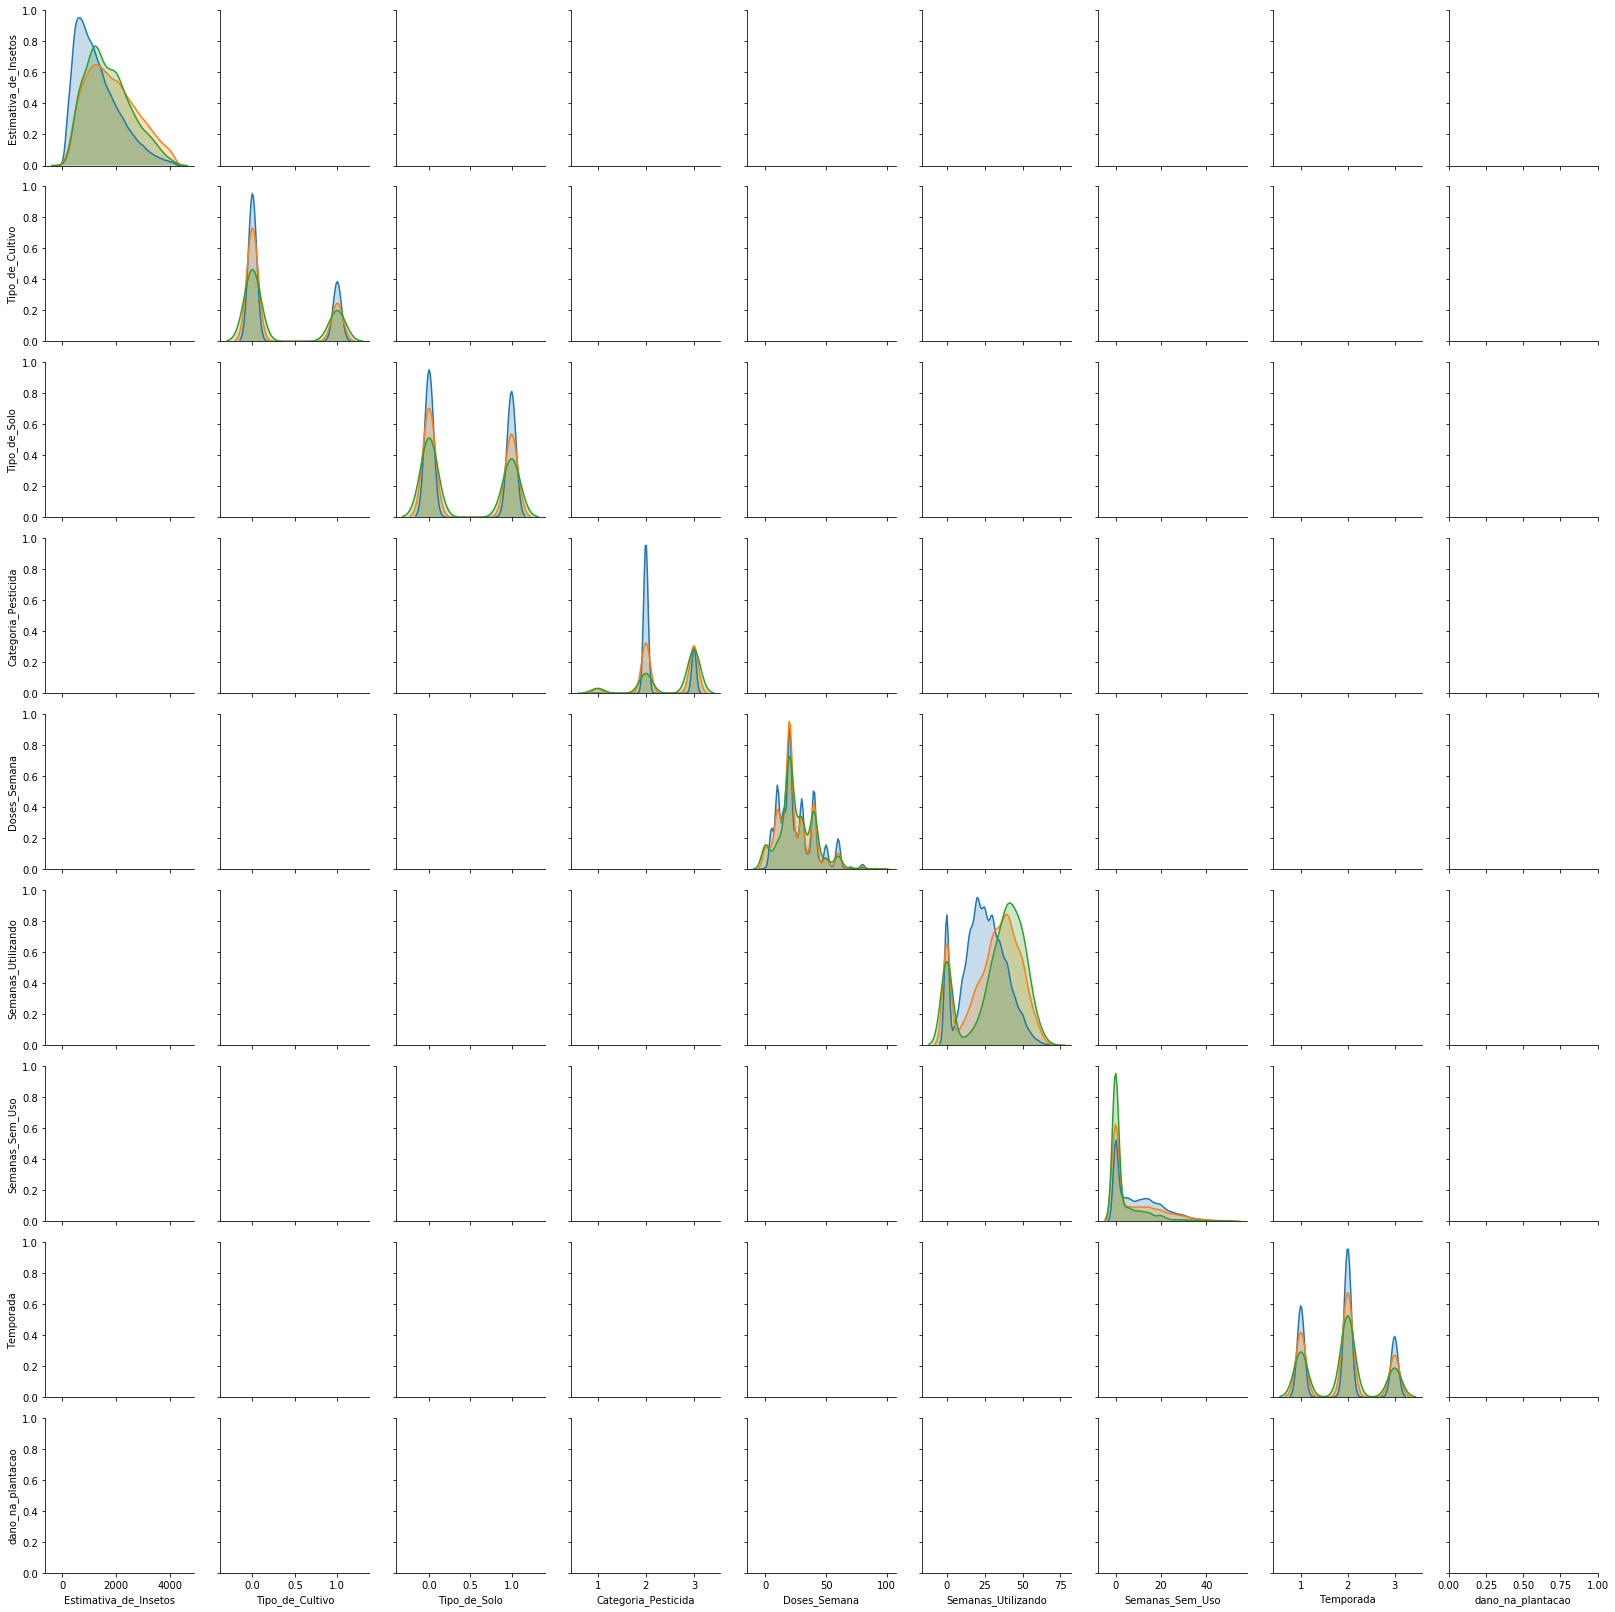

In [48]:
sns.pairplot(treino,hue='dano_na_plantacao')